In [1]:
# Install necessary libraries
!pip install torch torchvision torchaudio scikit-learn pandas seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [9]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset

In [2]:
import pandas as pd

file_path = "/content/2018-06-06-pdb-intersect-pisces.csv"

df = pd.read_csv(file_path, low_memory=False)
print("Raw Data (First 5 Rows):\n", df.head())
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)


Raw Data (First 5 Rows):
   pdb_id chain_code                   seq                  sst8  \
0   1FV1          F  NPVVHFFKNIVTPRTPPPSQ  CCCCCBCCCCCCCCCCCCCC   
1   1LM8          H  DLDLEMLAPYIPMDDDFQLR  CCCCCCCCCBCCSCCCEECC   
2   1O06          A  EEDPDLKAAIQESLREAEEA  CCCHHHHHHHHHHHHHHHTC   
3   1QOW          D  CTFTLPGGGGVCTLTSECI*  CCTTSCTTCSSTTSSTTCCC   
4   1RDQ          I  TTYADFIASGRTGRRNAIHD  CHHHHHHTSSCSSCCCCEEC   

                   sst3  len  has_nonstd_aa Exptl.  resolution  R-factor  \
0  CCCCCECCCCCCCCCCCCCC   20          False   XRAY        1.90      0.23   
1  CCCCCCCCCECCCCCCEECC   20          False   XRAY        1.85      0.20   
2  CCCHHHHHHHHHHHHHHHCC   20          False   XRAY        1.45      0.19   
3  CCCCCCCCCCCCCCCCCCCC   20           True   XRAY        1.06      0.14   
4  CHHHHHHCCCCCCCCCCEEC   20          False   XRAY        1.26      0.13   

   FreeRvalue  
0        0.27  
1        0.24  
2        0.22  
3        1.00  
4        0.16  
Dataset Shape: (90

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Extract relevant columns
X = df["seq"].values  # Protein sequences
y = df["sst3"].values  # Secondary structure labels

# Check if X and y are empty
if len(X) == 0 or len(y) == 0:
    raise ValueError("X or y is empty. Check data extraction!")

print("X shape:", len(X))
print("y shape:", len(y))
print("First 5 sequences in X:", X[:5])
print("First 5 labels in y:", y[:5])


X shape: 9078
y shape: 9078
First 5 sequences in X: ['NPVVHFFKNIVTPRTPPPSQ' 'DLDLEMLAPYIPMDDDFQLR' 'EEDPDLKAAIQESLREAEEA'
 'CTFTLPGGGGVCTLTSECI*' 'TTYADFIASGRTGRRNAIHD']
First 5 labels in y: ['CCCCCECCCCCCCCCCCCCC' 'CCCCCCCCCECCCCCCEECC' 'CCCHHHHHHHHHHHHHHHCC'
 'CCCCCCCCCCCCCCCCCCCC' 'CHHHHHHCCCCCCCCCCEEC']


In [11]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert categorical to numerical

# Convert to tensor
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

print("Encoded y shape:", y_tensor.shape)
print("Class mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Encoded y shape: torch.Size([1000])
Class mapping: {0.08: 0, 0.09: 1, 0.11: 2, 0.12: 3, 0.13: 4, 0.14: 5, 0.15: 6, 0.16: 7, 0.17: 8, 0.18: 9, 0.19: 10, 0.2: 11, 0.21: 12, 0.22: 13, 0.23: 14, 0.24: 15, 0.25: 16, 0.26: 17, 0.27: 18, 0.28: 19, 0.29: 20, 0.3: 21, 0.31: 22, 0.32: 23, 1.0: 24}


# **1**

Epoch 1, Loss: 0.0
Epoch 2, Loss: 5.920189869357273e-05
Epoch 3, Loss: 0.4037801921367645
Epoch 4, Loss: 0.15781830251216888
Epoch 5, Loss: 0.025257965549826622
Accuracy: 0.9600


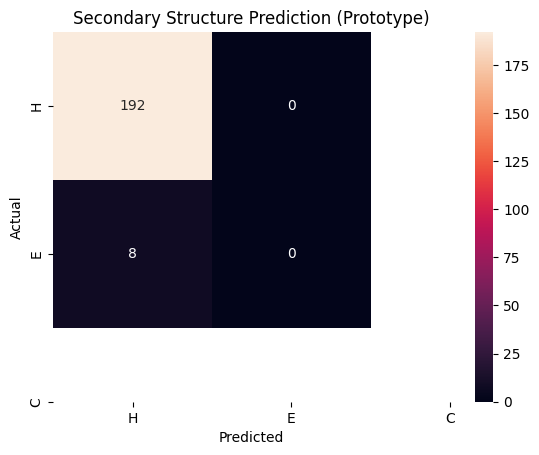

In [14]:
# ===========================
# 📌 1. Load and Preprocess Data
# ===========================
file_path = "/content/2018-06-06-pdb-intersect-pisces.csv"

df = pd.read_csv(file_path)

# ✅ Limit dataset size for speed
df = df.head(1000)

# ✅ Select numeric columns
df = df.select_dtypes(include=[np.number])

# ✅ Drop NaNs
df = df.dropna()

# ✅ Convert to NumPy arrays
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

# ✅ Encode labels if categorical
if isinstance(y[0], str):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# ✅ Use DataLoader for speed
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)

# ===========================
# 📌 2. Define Simplified Model
# ===========================
class FastStructureNet(nn.Module):
    def __init__(self):
        super(FastStructureNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# ✅ Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FastStructureNet().to(device)

# ===========================
# 📌 3. Train the Model
# ===========================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ✅ Reduce epochs for speed
epochs = 5

for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# ===========================
# 📌 4. Evaluate Model
# ===========================
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_pred = model(X_test_tensor).argmax(dim=1).cpu().numpy()

# ✅ Accuracy Calculation
# Ensure y_test is integer type
y_test = y_test.astype(int)

# Ensure y_pred is integer
y_pred = y_pred.astype(int)

# Now compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


# ===========================
# 📌 5. Visualize Results
# ===========================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["H", "E", "C"], yticklabels=["H", "E", "C"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Secondary Structure Prediction (Prototype)")
plt.show()


# **2**

Epoch 1, Loss: 0.020618492737412453
Epoch 2, Loss: 0.12570792436599731
Epoch 3, Loss: 0.018161427229642868
Epoch 4, Loss: 0.020757466554641724
Epoch 5, Loss: 0.024030832573771477
Accuracy: 0.9600


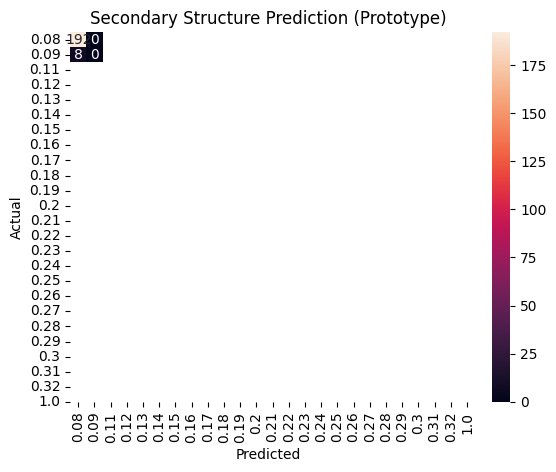

In [17]:


# ✅ Load Data
file_path = "/content/2018-06-06-pdb-intersect-pisces.csv"
df = pd.read_csv(file_path)

# ✅ Limit dataset size for speed
df = df.head(1000)

# ✅ Select numeric columns
df = df.select_dtypes(include=[np.number])

# ✅ Drop NaNs
df = df.dropna()

# ✅ Convert to NumPy arrays
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

# ✅ Encode labels if categorical
if isinstance(y[0], str):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# ✅ Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ✅ Detect Number of Classes Dynamically
num_classes = len(np.unique(y))

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# ✅ Use DataLoader for speed
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)

# ===========================
# 📌 2. Define Improved Model
# ===========================
class FastStructureNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FastStructureNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout = nn.Dropout(0.3)  # Regularization
        self.fc2 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x  # Raw logits (CrossEntropyLoss will handle softmax)

# ✅ Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FastStructureNet(input_size=X_train.shape[1], num_classes=num_classes).to(device)

# ===========================
# 📌 3. Train the Model
# ===========================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ✅ Reduce epochs for speed
epochs = 5

for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# ===========================
# 📌 4. Evaluate Model
# ===========================
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_pred = model(X_test_tensor).argmax(dim=1).cpu().numpy()

# ✅ Ensure `y_test` format before accuracy calculation
y_test = np.ravel(y_test)  # Flatten if needed
y_pred = np.ravel(y_pred)  # Ensure shape matches

# ✅ Compute Accuracy
y_test = y_test.astype(int)

# Ensure y_pred is integer
y_pred = y_pred.astype(int)

# Now compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# ===========================
# 📌 5. Visualize Results
# ===========================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Secondary Structure Prediction (Prototype)")
plt.show()
